In [3]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB 1.3 MB/s eta 0:00:01
   --------- ------------------------------ 143.4/626.3 kB 2.1 MB/s eta 0:00:01
   ------------------- -------------------- 307.2/626.3 kB 2.7 MB/s eta 0:00:01
   ------------------------------ --------- 471.0/626.3 kB 2.7 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.6 MB/s eta 0:00:00


In [1]:
!pip install pandas numpy nltk textblob

  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.6 MB 4.2 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/11.6 MB 4.2 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/11.6 MB 3.5 MB/s eta 0:00:03
   --------- ------------------------------ 2.9/11.6 MB 3.7 MB/s eta 0:00:03
   ------------ --------------------------- 3.7/11.6 MB 3.8 MB/s eta 0:00:03
   -------------- ------------------------- 4.2/11.6 MB 3.9 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.6 MB 3.5 MB/s eta 0:00:02
   ------------------- -------------------- 5.8/11.6 MB 3.6 MB/s eta 0:00:02
   ----------------------- ---------------- 6.8/11.6 MB 3.6 MB/

In [4]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import Word, TextBlob


In [5]:
df=pd.read_csv("phisingDataset/CEAS_08.csv")

In [6]:
#Phishing (1) vs. Legitimate (0)

In [7]:
df.head()

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1


In [8]:
df["sender"].value_counts()

sender
qydlqcws-iacfym@issues.apache.org                  462
Guido van Rossum <hoauf@python.org>                295
"\\"Martin v. Löwis\\"" <qpnysl@v.loewis.de>       276
"Carlos E. R." <vyjwd.trpcau@telefonica.net>       208
Aaron Kulkis <cmiqlkx91@hotpop.com>                183
                                                  ... 
Xavier Bruce <Xavier@radio-atut.de>                  1
Daily Top 10 <lculably_1970@1075pictures.com>        1
"Jess N. Coates" <j.n.coates_bm@mindspring.com>      1
Norma Stinson <Norma@qldnet.com.au>                  1
Abhijit Vyas <xpojhbz@gmail.com>                     1
Name: count, Length: 24578, dtype: int64

In [9]:
df["sender_2"]=df['sender'].str.split('@').str[1]

In [10]:
df["sender_2"].value_counts()

sender_2
gmail.com>            2628
python.org>            527
issues.apache.org      462
v.loewis.de>           289
google.com>            239
                      ... 
concrete-pipe.org>       1
circleins.co.uk>         1
npdc.govt.nz>            1
cr-sdc.org>              1
careplusnj.org>          1
Name: count, Length: 16994, dtype: int64

In [11]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SantoshKumar\AppData\Roaming\nltk_data...


True

In [12]:
sia=SentimentIntensityAnalyzer()

In [13]:
sia.polarity_scores("It is terrible")["compound"]

-0.4767

In [14]:
def get_compound_score(text):
    return sia.polarity_scores(text)['compound']

In [15]:
def get_compound_score(text):
    return sia.polarity_scores(text)['compound']

df['subject'] = df['subject'].astype(str)
df['body'] = df['body'].astype(str)


In [16]:
df['Compound_Subject'] = df['subject'].apply(get_compound_score)


In [17]:
df['Compound_Body'] = df['body'].apply(get_compound_score)

In [18]:
df["Compound"]=df['Compound_Subject'].astype(float)+df['Compound_Body'].astype(float)

In [19]:
bins = [-2, -1, 0, 1,2]
labels = ['-2 to -1', '-1 to 0', '0 to 1', '1 to 2']

# Yeni etiketlenmiş sütunu oluşturun
df['Compound_Label'] = pd.cut(df['Compound'], bins=bins, labels=labels, include_lowest=True)

In [20]:
df.head()

,sender,receiver,date,subject,body,label,urls,sender_2,Compound_Subject,Compound_Body,Compound,Compound_Label
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1,iworld.de>,-0.6715,-0.2462,-0.9177,-1 to 0
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1,icable.ph>,0.0000,0.4404,0.4404,0 to 1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1,universalnet.psi.br>,0.2023,-0.9958,-0.7935,-1 to 0
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1,pobox.com>,0.2960,0.9920,1.2880,1 to 2
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1,loanofficertool.com>,0.0000,0.0000,0.0000,-1 to 0


In [21]:
df["subject"]=df["subject"].str.lower()

In [22]:
df["body"]=df["body"].str.lower()

In [23]:
df["Subject+Body"]=df["subject"]+" "+df["body"]

In [24]:
df["Subject+Body"]=df["Subject+Body"].str.replace('[^\w\s]','')

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\SantoshKumar\AppData\Local\Temp\ipykernel_18500\3434368330.py:1: SyntaxWarning: invalid escape sequence '\w'
  df["Subject+Body"]=df["Subject+Body"].str.replace('[^\w\s]','')


In [25]:
!pip install openpyxl

In [26]:
spam_words=pd.read_excel("phisingDataset/Spam_Words.xlsx")

In [27]:
spam_words["SPAM WORDS"]=spam_words["SPAM WORDS"].str.lower()

In [28]:
spam_words["SPAM WORDS"]=spam_words["SPAM WORDS"].str.replace('[^\w\s]','')

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\SantoshKumar\AppData\Local\Temp\ipykernel_18500\1706326632.py:1: SyntaxWarning: invalid escape sequence '\w'
  spam_words["SPAM WORDS"]=spam_words["SPAM WORDS"].str.replace('[^\w\s]','')


In [29]:
def count_spam_words(text, spam_words):
    text = text.lower()  
    count = 0
    for word in spam_words["SPAM WORDS"]:
        if word in text:
            count += 1
    return count

In [30]:
df["Spam_Count"]=df["Subject+Body"].apply(lambda x: count_spam_words(x, spam_words))

In [31]:
df["Text_Length"] = df["Subject+Body"].apply(lambda x: len(x))

In [32]:
df['edu_mail'] = df['sender'].apply(lambda x: 1 if 'edu' in x else 0)
df['python_mail'] = df['sender'].apply(lambda x: 1 if 'python' in x else 0)
df['apache_mail'] = df['sender'].apply(lambda x: 1 if 'apache' in x else 0)
df['loewis_mail'] = df['sender'].apply(lambda x: 1 if 'loewis' in x else 0)
df['gmail_mail'] = df['sender'].apply(lambda x: 1 if 'gmail' in x else 0)
df['org_mail'] = df['sender'].apply(lambda x: 1 if 'org' in x else 0)


In [33]:
df.head()

,sender,receiver,date,subject,body,label,urls,sender_2,Compound_Subject,Compound_Body,...,Compound_Label,Subject+Body,Spam_Count,Text_Length,edu_mail,python_mail,apache_mail,loewis_mail,gmail_mail,org_mail
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",never agree to be a loser,"buck up, your troubles caused by small dimensi...",1,1,iworld.de>,-0.6715,-0.2462,...,-1 to 0,"never agree to be a loser buck up, your troubl...",0,299,0,0,0,0,0,0
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",befriend jenna jameson,\nupgrade your sex and pleasures with these te...,1,1,icable.ph>,0.0000,0.4404,...,0 to 1,befriend jenna jameson \nupgrade your sex and ...,1,105,0,0,0,0,0,0
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",cnn.com daily top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1,universalnet.psi.br>,0.2023,-0.9958,...,-1 to 0,cnn.com daily top 10 >+=+=+=+=+=+=+=+=+=+=+=+=...,4,3939,0,0,0,0,0,0
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",re: svn commit: r619753 - in /spamassassin/tru...,would anyone object to removing .so from this ...,0,1,pobox.com>,0.2960,0.9920,...,1 to 2,re: svn commit: r619753 - in /spamassassin/tru...,1,24569,0,0,0,0,0,0
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",specialpricespharmmoreinfo,\nwelcomefastshippingcustomersupport\nhttp://7...,1,1,loanofficertool.com>,0.0000,0.0000,...,-1 to 0,specialpricespharmmoreinfo \nwelcomefastshippi...,0,202,0,0,0,0,0,0


In [34]:
df_new=df[["urls","Compound_Subject","Spam_Count","Text_Length","edu_mail","python_mail","apache_mail","loewis_mail","gmail_mail","org_mail","label"]]

In [36]:
!pip install seaborn matplotlib

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.9.2-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.8 MB 1.2 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/7.8 MB 1.4 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/7.8 MB 1.5 MB/s eta 0:00:05
   -------- ------------------------------- 1.6/7.8 MB 1.4 MB/s eta 0:00:05
   -------- ------------------------------- 1.6/7.8 MB 1.4 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/7.8 MB 1.2 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/7.8 MB 1.2 MB/s eta 0:00:05
   

Matplotlib is building the font cache; this may take a moment.


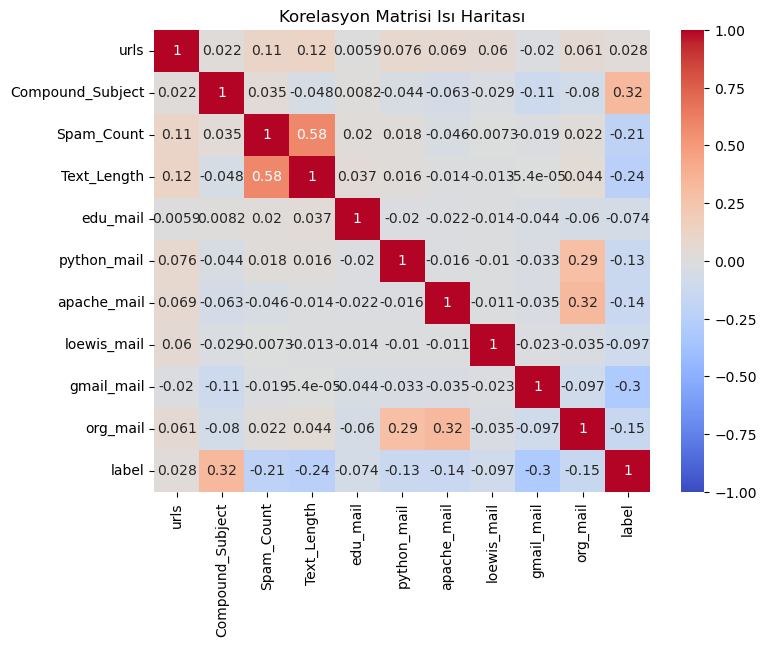

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_new.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasyon Matrisi Isı Haritası')
plt.show()

In [39]:
!pip install scikit-learn

  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 409.0 kB/s eta 0:00:26
   - -------------------------------------- 0.5/11.0 MB 409.0 kB/s eta 0:00:26
   - -------------------------------------- 0.5/11.0 MB 409.0 kB/s eta 0:00:26
   -- ------------------------------------- 0.8/11.0 MB 435.8 kB/s eta 0:00:24
   -- ------------------------------------- 0.8/11.0 MB 435.8 kB/s eta 0:00:24
   --- ------------------------------------ 1.0/11.0 MB 441.3 kB/s eta 0:00:23
   --- ------------------------------------ 1.0/11.0 MB 441.3 kB/s eta 0:00:23
   --- ---------------------

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDV=TfidfVectorizer()



In [37]:
from scipy.sparse import hstack, csr_matrix

In [38]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000, max_df=0.95, min_df=2)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Subject+Body'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

sparse_features = csr_matrix(df[["urls", "Compound_Subject", "Spam_Count", "Text_Length", "edu_mail", "python_mail", "apache_mail", "loewis_mail", "gmail_mail", "org_mail"]].values)

X = hstack([sparse_features, tfidf_matrix])

In [39]:
import pickle

# Save the TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

In [40]:
y=df["label"]

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [43]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9417723674129564


c:\Users\SantoshKumar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
X_2=tfidf_df


In [45]:
X_2_train, X_2_test, y_train, y_test = train_test_split(X_2, y, test_size=0.3, random_state=42)


In [46]:
model = LogisticRegression()
model.fit(X_2_train, y_train)

y_pred = model.predict(X_2_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.993785647399336


In [47]:
# Save the trained RandomForest model
with open("phishing_logistic_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [48]:
X_3=df[["urls", "Compound_Subject", "Spam_Count", "Text_Length", "edu_mail", "python_mail", "apache_mail", "loewis_mail", "gmail_mail", "org_mail"]]

In [49]:
X_3_train, X_3_test, y_train, y_test = train_test_split(X_3, y, test_size=0.3, random_state=42)

In [50]:
model = LogisticRegression()
model.fit(X_3_train, y_train)

y_pred = model.predict(X_3_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7255469481569763


c:\Users\SantoshKumar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
#BEST OPTION IS X_2

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
model = RandomForestClassifier()
model.fit(X_2_train, y_train)

y_pred = model.predict(X_2_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.993785647399336


In [54]:
# Save the trained RandomForest model
with open("phishing_random_model.pkl", "wb") as f:
    pickle.dump(model, f)